# Блок про подсчет кардинальности множеств

### Реализовать алгоритм [Флажоле-Мартена](https://en.wikipedia.org/wiki/Flajolet–Martin_algorithm)


1) Считаем нули в голове хеша

2) Считаем максимум

3) Вычисляем оценку для кол-ва элементов


### Оценить ошибку алгоритма в зависимости от кол-ва уникальных элементов

1) Генерируем случайный список из N уникальных элементов с повторениями (например как в ячейке ниже)

2) Считаем точное кол-во уников, сравниваем с Флажоле-Мартеном


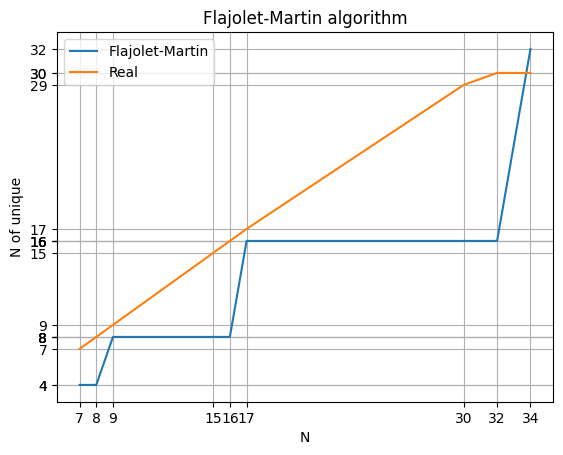

In [113]:
import random
import numpy as np
import matplotlib.pyplot as plt


def trailing_zeros(x):
  if x == 0:
    return 1
  count = 0
  while x & 1 == 0:
    count += 1
    x >>= 1
  return count


def flajolet_martin(list: list):
  max_zeros = 0
  for i in range(len(list)):
    hash_vals = [trailing_zeros(random.choice(list))
                 for _ in range(len(list))]
    max_zeros = max(max_zeros, max(hash_vals))

  return 2 ** max_zeros


num_of_uniques = [7, 8, 9, 15, 16, 17, 30, 32, 34]


def count_uniques(n):
  ds = np.random.choice(n, 100)
  estimated = flajolet_martin(ds)
  real = len(np.unique(ds))
  return [estimated, real]


res = [count_uniques(n) for n in num_of_uniques]

plt.title('Flajolet-Martin algorithm')
plt.xlabel('N')
plt.ylabel('N of unique')
plt.plot(num_of_uniques, res)
plt.xticks(num_of_uniques)
plt.yticks([sample[i] for sample in res for i in [0, 1]])
plt.grid()
plt.legend(['Flajolet-Martin', 'Real'])


# Блок про О-нотацию

Дан список рекуррентных соотношений на некоторые алгоритмы. Используя метод Акра-Бацци, найдите сложность алгоритма в О-нотации.


1) $T(n) = 2T({n\over4})+ 3T({n\over6})+\Theta(nlogn)$

2) $T(n) = 2T({n\over2})+ {8\over9}T({3n\over4})+\Theta({n^2 \over logn})$

3) $T(n) = T({n\over2})+ \Theta({logn})$

4) $T(n) = {1\over2}T({n\over2})+ \Theta({1\over n})$

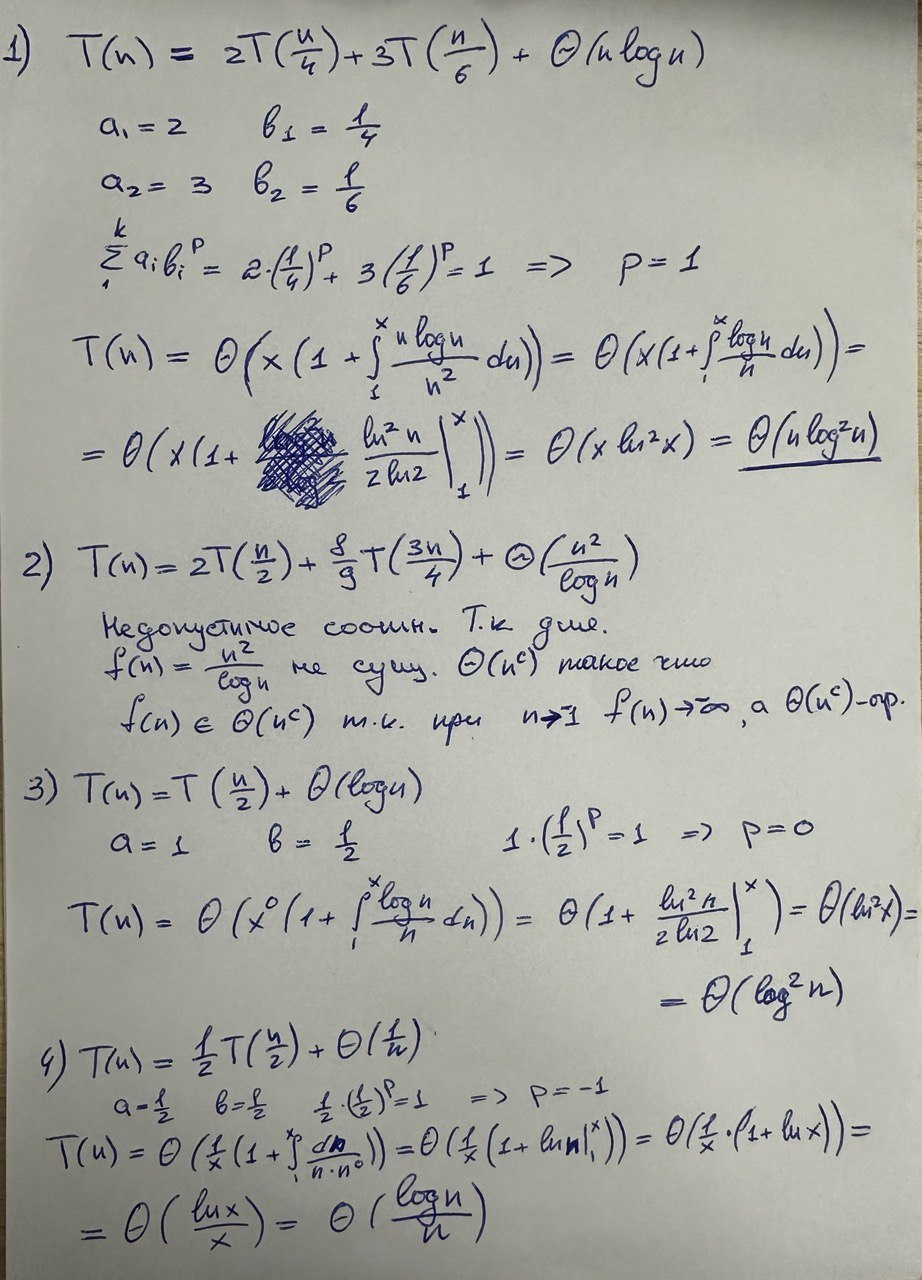

5а) Докажите сложность алгоритма "медиана медиан" и поясните, почему использование вместо числа < 5 не дает правильной асимптотики:

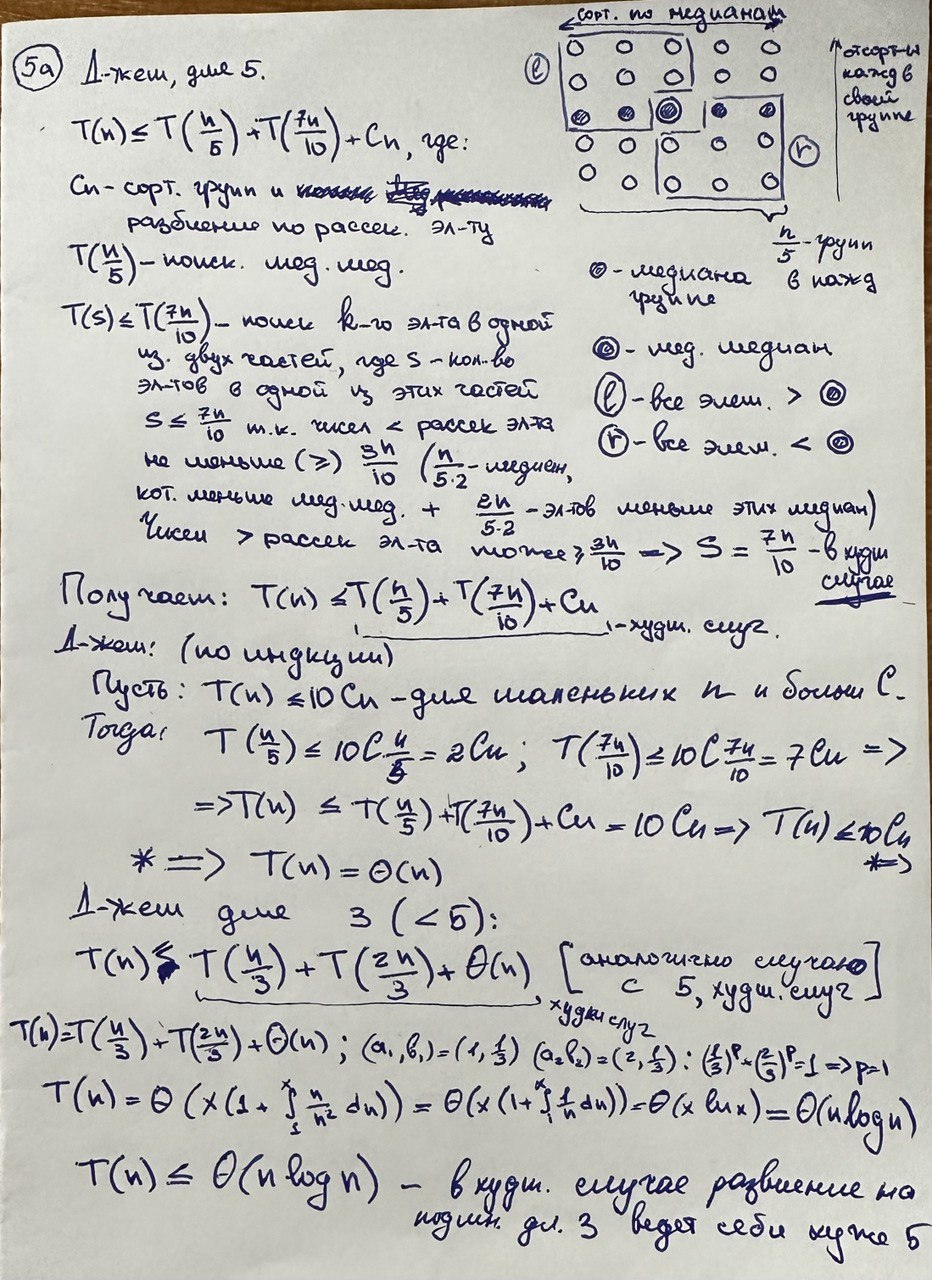

5b) Эмпирически покажите, что алгоритм "медиана медиан" работает хуже по времени для деления на отрезки длины 3 и 7. (генерируете случайный список длины l, ищете медиану, замеряете время при различных способах разделения на куски - 3,5 и 7)

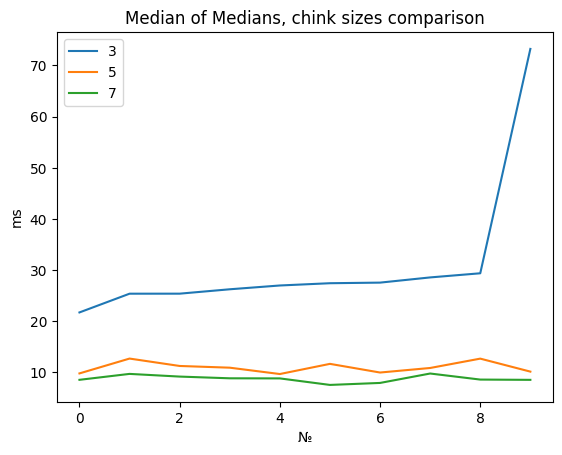

In [83]:
import time
import numpy as np
import matplotlib.pyplot as plt 


def median_of_medians(arr, l):
    if len(arr) <= l:
        return sorted(arr)[len(arr) // 2]

    groups = [arr[i:i + l] for i in range(0, len(arr), l)]
    medians = [sorted(group)[len(group) // 2] for group in groups]
    pivot = median_of_medians(medians, l)
    mid = len(arr) // 2

    smaller = [x for x in arr if x < pivot]
    smaller_len = len(smaller)
    if smaller_len > mid:
        return median_of_medians(smaller, l)

    larger = [x for x in arr if x > pivot]
    if smaller_len < mid:
        return median_of_medians(larger, l)

    return pivot


def count_time(arr: list, l: int):
  start = time.time()
  median = median_of_medians(arr, l)
  elapsed_time = time.time() - start
  return elapsed_time * 1000

def run_once():
    test_list = np.random.randint(10000, size=(5000))
    return [count_time(test_list, l) for l in [3,5,7]]

time_records = [run_once() for i in range(10)]
time_records.sort()

x = range(10)

plt.title('Median of Medians, chink sizes comparison')
plt.xlabel('№')
plt.ylabel('ms')
plt.plot(x, time_records)
plt.legend(['3','5','7'])
